In [ ]:
def make_Dictionary(train_dir):
    emails = [os.path.join......]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 1:
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    list_to_remove = dictionary.keys()
for item in list_to_remove:
    if item.isalpha() == False: 
        del dictionary[item]
    elif len(item) == 1:
        del dictionary[item]
dictionary = dictionary.most_common(1000)
return dictionary

In [5]:
import numpy as np
import pandas as pd

In [6]:
import csv

subject_lst = []
with open('./nigm.csv', 'r', encoding='utf-8', errors='ignore') as f:
    data = csv.reader(f)
    for ele in data:
        subject_lst.append(ele)
print(len(subject_lst))
print(subject_lst[0:10])

10249
[['Sender Email', 'Subject', 'Policy', 'Severity'], ['KAILAS.BHOLE@ADANI.COM', 'Purchase Invoices for Date 30.04.2019', 'DLP Policy for monitoring public domain', 'Medium'], ['Hemalkumar.Shah@adani.com', 'Re: Notice of Name Change', 'Non Adani Email Policy', 'High'], ['Hitendra.Patel3@adani.com', 'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar', 'Non Adani Email Policy', 'High'], ['Hitendra.Patel3@adani.com', 'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar', 'Monitor Outgoing Commercial Data', 'High'], ['SCE.Tirora@adani.com', 'Daily line loading for APML, Tirora dated- 30/04/2019', 'DLP Policy for monitoring public domain', 'Medium'], ['Pranat.Narain@adani.com', '', 'Non Adani Email Policy', 'High'], ['Bhashit.Dholakia@adani.com', 'FW: Emailing: Networth & PBG Calculations', 'DLP Policy for monitoring public domain', 'Medium'], ['Bhashit.Dholakia@adani.com', 'RE: Emailing: Networth & PBG Calculations', 'DLP Policy for monitoring public domain', 'Mediu

In [7]:
data_columns = subject_lst.pop(0)
subject_lst

[['KAILAS.BHOLE@ADANI.COM',
  'Purchase Invoices for Date 30.04.2019',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Hemalkumar.Shah@adani.com',
  'Re: Notice of Name Change',
  'Non Adani Email Policy',
  'High'],
 ['Hitendra.Patel3@adani.com',
  'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Non Adani Email Policy',
  'High'],
 ['Hitendra.Patel3@adani.com',
  'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Monitor Outgoing Commercial Data',
  'High'],
 ['SCE.Tirora@adani.com',
  'Daily line loading for APML, Tirora dated- 30/04/2019',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Pranat.Narain@adani.com', '', 'Non Adani Email Policy', 'High'],
 ['Bhashit.Dholakia@adani.com',
  'FW: Emailing: Networth & PBG Calculations',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Bhashit.Dholakia@adani.com',
  'RE: Emailing: Networth & PBG Calculations',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['

In [8]:
stop_wordss = ['RE:', 'FW:', 'Fwd:','Automatic reply:']

def filtering_text(original_txt, stop_words_lst):
    original_txt_lst = original_txt.split(' ')
    for org_txt in original_txt_lst:
        if org_txt in stop_words_lst:
            original_txt_lst.remove(org_txt)
        else:
            continue
    return ' '.join(original_txt_lst)

final_lst = []
for ele in subject_lst:
    txt = ''.join(ele)
    filter_txt = filtering_text(txt, stop_wordss)
    filter_txt = filter_txt.strip()
    num_of_words = len(filter_txt.split(' '))
    if num_of_words == 1 or num_of_words == 2 or num_of_words == 0:
        final_lst.append((txt, 'Suspecious'))
    else:
        final_lst.append((txt, 'Non_Suspecious'))
        
        
data = {
    'subject': [ele[0] for ele in final_lst],
    'category': [ele[1] for ele in final_lst]
}
data_frame = pd.DataFrame(data)
print(data_frame)

data_frame.to_csv("DLP_cat.csv")

                                                 subject        category
0      KAILAS.BHOLE@ADANI.COMPurchase Invoices for Da...  Non_Suspecious
1      Hemalkumar.Shah@adani.comRe: Notice of Name Ch...  Non_Suspecious
2      Hitendra.Patel3@adani.comRE: LHM 400, 140469, ...  Non_Suspecious
3      Hitendra.Patel3@adani.comRE: LHM 400, 140469, ...  Non_Suspecious
4      SCE.Tirora@adani.comDaily line loading for APM...  Non_Suspecious
5      Pranat.Narain@adani.comNon Adani Email PolicyHigh  Non_Suspecious
6      Bhashit.Dholakia@adani.comFW: Emailing: Networ...  Non_Suspecious
7      Bhashit.Dholakia@adani.comRE: Emailing: Networ...  Non_Suspecious
8      Sic.Akola@Adani.ComEnergy meter reading of ICT...  Non_Suspecious
9      Sic.Akola@Adani.ComEnergy meter reading of ICT...  Non_Suspecious
10     SIC660.Mundra@adani.comAPMul ST-5 real time ch...  Non_Suspecious
11     KULDEEP.RATHOD@ADANI.COMAutomatic reply: DESPA...  Non_Suspecious
12     SAP.BATCh@adani.comCY10DLP Policy for monito

In [9]:
h = filtering_text('FW: Movement Plan', stop_words_lst=stop_wordss)
print(h)

Movement Plan


In [10]:
def filtering_text(original_txt, stop_words_lst):
    for word in stop_words_lst:
        if word in original_txt:
            filter_txt = original_txt.replace(word, '')
        else:
            filter_txt = original_txt
    return filter_txt

In [11]:
subject_lst

[['KAILAS.BHOLE@ADANI.COM',
  'Purchase Invoices for Date 30.04.2019',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Hemalkumar.Shah@adani.com',
  'Re: Notice of Name Change',
  'Non Adani Email Policy',
  'High'],
 ['Hitendra.Patel3@adani.com',
  'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Non Adani Email Policy',
  'High'],
 ['Hitendra.Patel3@adani.com',
  'RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Monitor Outgoing Commercial Data',
  'High'],
 ['SCE.Tirora@adani.com',
  'Daily line loading for APML, Tirora dated- 30/04/2019',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Pranat.Narain@adani.com', '', 'Non Adani Email Policy', 'High'],
 ['Bhashit.Dholakia@adani.com',
  'FW: Emailing: Networth & PBG Calculations',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['Bhashit.Dholakia@adani.com',
  'RE: Emailing: Networth & PBG Calculations',
  'DLP Policy for monitoring public domain',
  'Medium'],
 ['

In [12]:
def get_email(subject_lst:list):
    for lst in subject_lst:
        email, subject, _, _ = lst
        yield email, subject

def susp_based_on_email(subject_lst:list):
    final_result = []
    for email_add, subject in get_email(subject_lst):
        email_add_to_lower = email_add.lower()
        if '@' in email_add_to_lower:
            split_email = email_add_to_lower.split('@')[-1].split('.')[0]
            if split_email == 'adani':
                final_result.append((email_add, subject, 'Non-Suspecious'))
            else: 
                final_result.append((email_add, subject, 'Suspecious'))
        else:
            continue
    return final_result
            
            
    

In [13]:
final_result = susp_based_on_email(subject_lst=subject_lst)

data_frame_data = {
    'email_address': [ele[0] for ele in final_result],
    'subject': [ele[1] for ele in final_result],
    'category': [ele[2] for ele in final_result]

}
data_frame_2 = pd.DataFrame(data_frame_data)
print(data_frame_2['category'].value_counts())

Non-Suspecious    9759
Suspecious         259
Name: category, dtype: int64


In [14]:
suspecious_email_lst = data_frame_2[data_frame_2['category'] == 'Suspecious']
suspecious_email_lst

,email_address,subject,category
45,Milan.Lenka@adanifoundation.com,RE: [SPF Softfail] Fwd: Attendance request_ADA...,Suspecious
102,Raj.Jadav@aiim.ac.in,FW: [Caution: Message contains Redirect URL co...,Suspecious
139,Sushama.Oza@adanifoundation.com,FW: Portfolio details,Suspecious
484,Mukeshkumar.Parmar@adanifoundation.com,mobilevan diseaswise data april 19,Suspecious
644,Raj.Jadav@aiim.ac.in,FW: [Caution: Message contains Redirect URL co...,Suspecious
820,Aditya.Sharma2@aiim.ac.in,Corporate Finance,Suspecious
821,Aditya.Sharma2@aiim.ac.in,Corporate Finance,Suspecious
877,LNatana.Sabapathy@adanifoundation.com,Re: Request - WPP - Quotation,Suspecious
878,LNatana.Sabapathy@adanifoundation.com,Re: Request - WPP - Quotation,Suspecious
927,Deepan.Raval@aiim.ac.in,Request for Campus Recruitment - 2019,Suspecious


In [30]:
non_suspecious_lst = data_frame_2[data_frame_2['category'] == 'Non-Suspecious']


email_address    9759
subject          9759
category         9759
dtype: int64

In [37]:
def suspecious_based_subject(suspecious_txt:str, non_suspecious_email_lst):
    output = []
    for txt in non_suspecious_email_lst['subject'][0:10]:
        if suspecious_txt in txt:
            output.append((txt, 'Suspecious'))
        else:
            output.append((txt, 'Non_Suspecious'))
        
    return output

output = suspecious_based_subject(suspecious_txt="Adani Tuna", non_suspecious_email_lst=non_suspecious_lst)
output
    
    

[('Purchase Invoices for Date 30.04.2019', 'Non_Suspecious'),
 ('Re: Notice of Name Change', 'Non_Suspecious'),
 ('RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Suspecious'),
 ('RE: LHM 400, 140469, Adani Tuna, Pressure transmitter 400bar',
  'Suspecious'),
 ('Daily line loading for APML, Tirora dated- 30/04/2019', 'Non_Suspecious'),
 ('', 'Non_Suspecious'),
 ('FW: Emailing: Networth & PBG Calculations', 'Non_Suspecious'),
 ('RE: Emailing: Networth & PBG Calculations', 'Non_Suspecious'),
 ('Energy meter reading of ICT LV SIDE and 765 KV Ektuni Line1 & 2 of Akola-II substation dtd: 30-04-2019',
  'Non_Suspecious'),
 ('Energy meter reading of ICT LV SIDE and 765 KV Ektuni Line1 & 2 of Akola-II substation dtd: 30-04-2019',
  'Non_Suspecious')]

In [255]:
type(suspecious_email_lst)

pandas.core.frame.DataFrame

In [244]:
import nltk
from nltk.corpus import stopwords
import string

from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [248]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

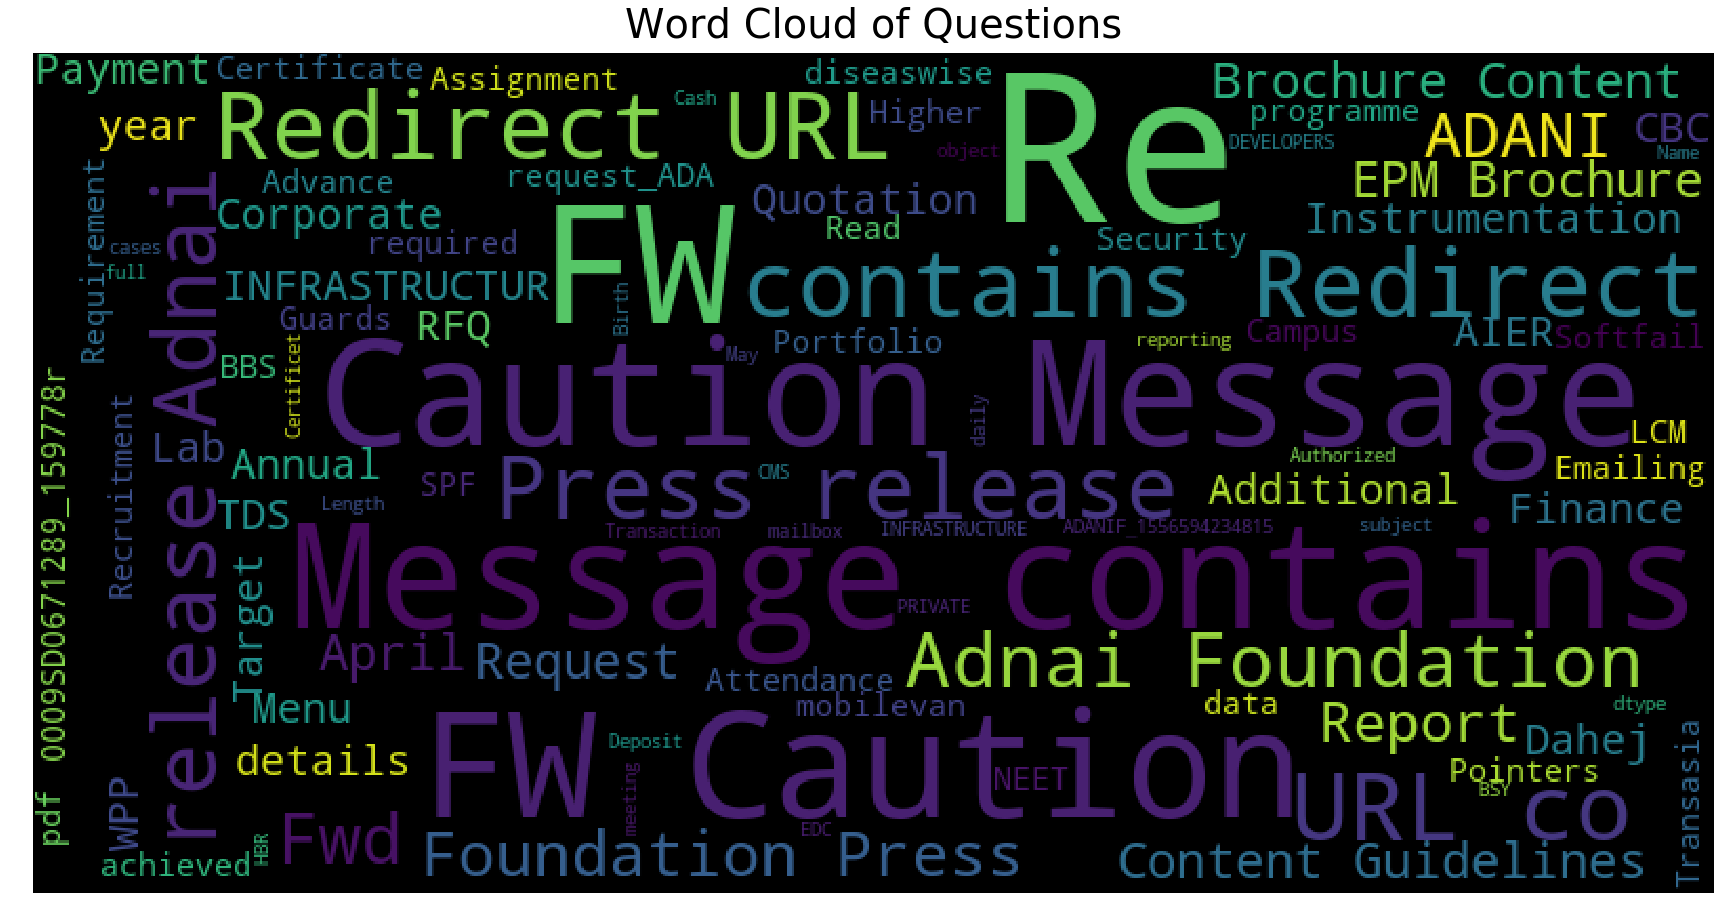

In [245]:
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(suspecious_email_lst["subject"], title="Word Cloud of Questions")

In [253]:
from collections import defaultdict
sus_df = suspecious_email_lst[suspecious_email_lst["category"]=="Suspecious"]


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)
for sent in sus_df["subject"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in Suspicious Data"])
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


C:\Users\ADMIN\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [318]:
suspecious_subjects = suspecious_email_lst['subject']
series_suspecious_sub = list(suspecious_subjects)
series_suspecious_sub

['RE: [SPF Softfail] Fwd: Attendance request_ADANI FOUNDATION_Adani Foundation - Odhisa_Apr-19',
 'FW: [Caution: Message contains Redirect URL content] Abridged summary of aiie-ele-2017@googlegroups.com - 2 updates in 2 topics',
 'FW: Portfolio details',
 'mobilevan diseaswise data april 19',
 'FW: [Caution: Message contains Redirect URL content] Abridged summary of aiie-cie-2015@googlegroups.com - 1 update in 1 topic',
 'Corporate Finance',
 'Corporate Finance',
 'Re: Request - WPP - Quotation',
 'Re: Request - WPP - Quotation',
 'Request for Campus Recruitment - 2019',
 'Emailing 0009SD0671289_159778r.pdf',
 'RE: LCM Pointers and Assignment.',
 'AIER Additional TDS',
 'AIER Additional TDS',
 'Re: 604975433||2261999940||ADANI INFRASTRUCTURE DEVELOPERS PRIVATE LIMITED||',
 'Re: 604975433||2261999940||ADANI INFRASTRUCTURE DEVELOPERS PRIVATE LIMITED||',
 'Press release - Adnai Foundation',
 'RFQ for Instrumentation Lab',
 'Press release - Adnai Foundation',
 'Press release - Adnai Founda

In [319]:
len(series_suspecious_sub)

259

In [320]:
stop_wordss = ['RE:', 'Re:', 'FW:', 'Fwd:','Automatic reply:']

def filtering_text(original_txt, stop_words_lst = stop_wordss):
    original_txt_lst = original_txt.split(' ')
    for org_txt in original_txt_lst:
        if org_txt in stop_words_lst:
            original_txt_lst.remove(org_txt)
        else:
            continue
    return ' '.join(original_txt_lst)


In [321]:
series_suspecious_sub = map(lambda txt: filtering_text(txt), series_suspecious_sub)
series_suspecious_sub = list(series_suspecious_sub)
series_suspecious_sub

['[SPF Softfail] Attendance request_ADANI FOUNDATION_Adani Foundation - Odhisa_Apr-19',
 '[Caution: Message contains Redirect URL content] Abridged summary of aiie-ele-2017@googlegroups.com - 2 updates in 2 topics',
 'Portfolio details',
 'mobilevan diseaswise data april 19',
 '[Caution: Message contains Redirect URL content] Abridged summary of aiie-cie-2015@googlegroups.com - 1 update in 1 topic',
 'Corporate Finance',
 'Corporate Finance',
 'Request - WPP - Quotation',
 'Request - WPP - Quotation',
 'Request for Campus Recruitment - 2019',
 'Emailing 0009SD0671289_159778r.pdf',
 'LCM Pointers and Assignment.',
 'AIER Additional TDS',
 'AIER Additional TDS',
 '604975433||2261999940||ADANI INFRASTRUCTURE DEVELOPERS PRIVATE LIMITED||',
 '604975433||2261999940||ADANI INFRASTRUCTURE DEVELOPERS PRIVATE LIMITED||',
 'Press release - Adnai Foundation',
 'RFQ for Instrumentation Lab',
 'Press release - Adnai Foundation',
 'Press release - Adnai Foundation',
 'Press release - Adnai Foundation

In [322]:
type(series_suspecious_sub)

list

In [323]:
series_suspecious_sub=pd.DataFrame(data=series_suspecious_sub)

In [324]:
north=series_suspecious_sub.reset_index()
type(north)
north.rename(columns={0:'subject'}, inplace=True)

In [325]:
del north["index"]

In [326]:
north.head()

,subject
0,[SPF Softfail] Attendance request_ADANI FOUNDA...
1,[Caution: Message contains Redirect URL conten...
2,Portfolio details
3,mobilevan diseaswise data april 19
4,[Caution: Message contains Redirect URL conten...


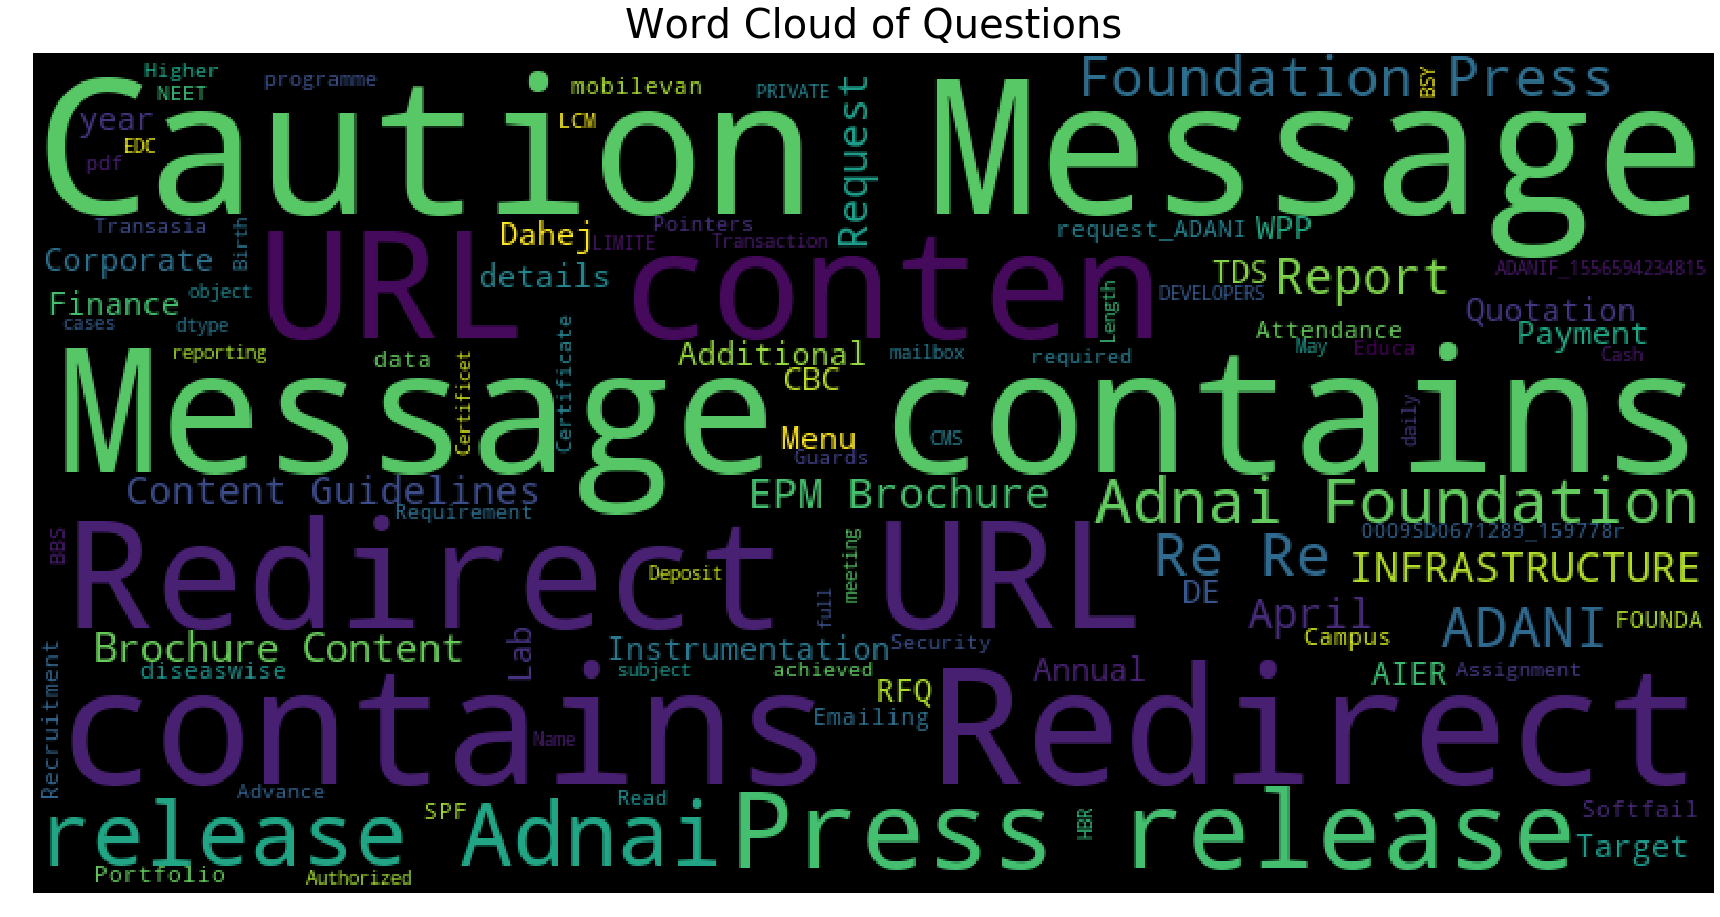

In [327]:
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(north["subject"], title="Word Cloud of Questions")

In [ ]:
from collections import defaultdict
sus_df = suspecious_email_lst[suspecious_email_lst["category"]=="Suspecious"]


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)
for sent in sus_df["subject"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in Suspicious Data"])
fig.append_trace(trace1, 1, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


In [192]:
import nltk

In [193]:
from nltk.tokenize import SExprTokenizer 
tk = SExprTokenizer(parens='[]')

In [236]:
def tokenizing(txt):

    try:
        tokenized = tk.tokenize(txt)
        word = tokenized[0]
        if word[0] == "[" and word[-1] == "]":
            return tokenized[0]
        else:
            return " "
    except IndexError as ie:
        return " "
foo = tokenizing(series_suspecious_sub[4])
foo

'[Caution: Message contains Redirect URL content]'

In [238]:
word_cluster = [tokenizing(t) for t in series_suspecious_sub]
type(word_cluster)

list

In [239]:
from collections import Counter
Counter(word_cluster)

Counter({'[SPF Softfail]': 1,
         '[Caution: Message contains Redirect URL content]': 10,
         ' ': 225,
         '[Newsletter]': 21,
         '[WARNING - COULD NOT SCAN FOR VIRUS & MALWARE]': 2})

In [241]:
10 / len(series_suspecious_sub)

0.03861003861003861

In [130]:
def get_lst(subject_lst:list):
    for lst in subject_lst:
        email, policy, severity = lst
        yield (email, policy, severity)

def convert_to_df(subject_lst:list):
    data = {
        'email': [email for email, _, _ in get_lst(subject_lst)],
        'policy': [policy for _,policy, _ in get_lst(subject_lst)],
        'severity': [severity for _, _, severity in get_lst(subject_lst)]
    }
    return pd.DataFrame(data)
    
df = convert_to_df(subject_lst)
df['email'] = df['email'].apply(lambda c: c.lower())

grouped_df=df.groupby(['policy','severity'])

df1=grouped_df.count()
df1.head()

,,email
policy,severity,
AEL - Admin Dept Confidential Data Policy,High,6
AEL - MA & AS Dept Confidential Data Policy,High,17
AEL-Abex Policy,High,43
AEL-HR Policy,High,177
Competitor Communications,Low,102


In [128]:
import pandas as pd

df.to_csv("email.csv")

In [120]:
df['email_url'] = df['email'].apply(lambda c: c.split('@')[-1])
df['email_url'].value_counts()

adani.com              9481
adani.in                278
                        230
adanifoundation.com     116
aiim.ac.in              107
adanihospitals.com       17
aikya.adanimail.com      11
howeindia.com             5
awel.com                  3
Name: email_url, dtype: int64

In [ ]:
suspicious=["Corporate Finance",'Campus Recuritment',""]